In [1]:
using Turing, Distributions, Plots, StatsPlots
using Gen

In [2]:
@gen function twoHeadsGen()
    a = @trace(bernoulli(0.5), :a)
    b = @trace(bernoulli(0.5), :b)
    c = @trace(bernoulli(0.5), :c)
    return a + b + c
    obs = @trace(normal(a + b + c, 0.1), :obs)
end;

In [5]:
function enumerate_twoHeadsGen()
    values_to_prob = Dict(0 => 0., 1 => 0., 2 => 0., 3 => 0.)
    a_values_to_prob = Dict(false => 0.5, true => 0.5)
    b_values_to_prob = Dict(false => 0.5, true => 0.5)
    c_values_to_prob = Dict(false => 0.5, true => 0.5)
    for a_val_prob in collect(a_values_to_prob)
        for b_val_prob in collect(b_values_to_prob)
            for c_val_prob in collect(c_values_to_prob)
                a = first(a_val_prob)
                b = first(b_val_prob)
                c = first(c_val_prob)
                a_prob = last(a_val_prob)
                b_prob = last(b_val_prob)
                c_prob = last(c_val_prob)
                values_to_prob[a+b+c] += a_prob*b_prob*c_prob
            end
        end
    end
    return values_to_prob
end;

In [7]:
values_to_prob = enumerate_twoHeadsGen()

Dict{Int64, Float64} with 4 entries:
  0 => 0.125
  2 => 0.375
  3 => 0.125
  1 => 0.375

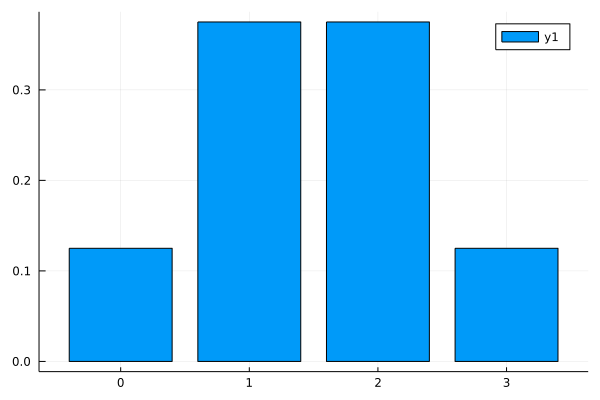

In [9]:
StatsPlots.bar(values_to_prob)